In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

C:\Users\Susant\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Susant\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


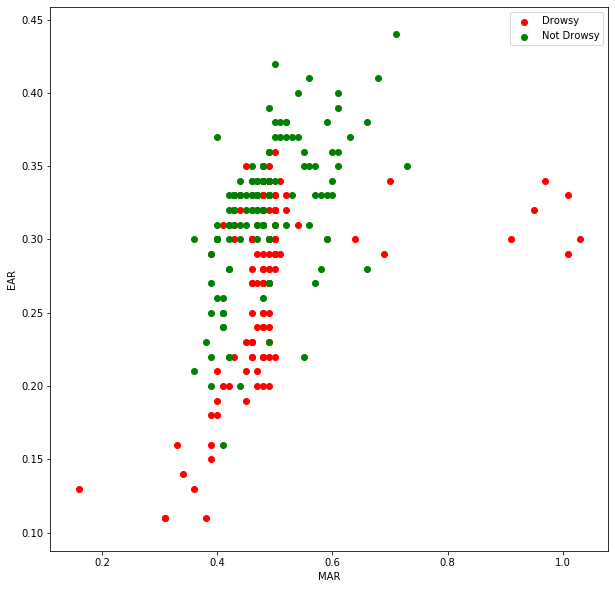

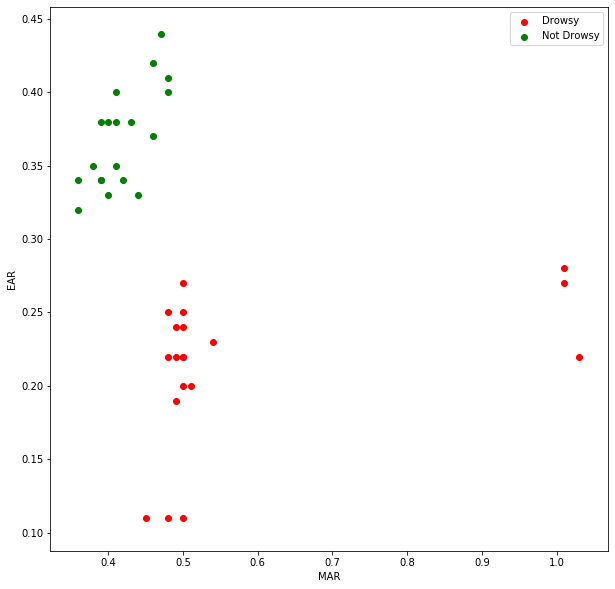

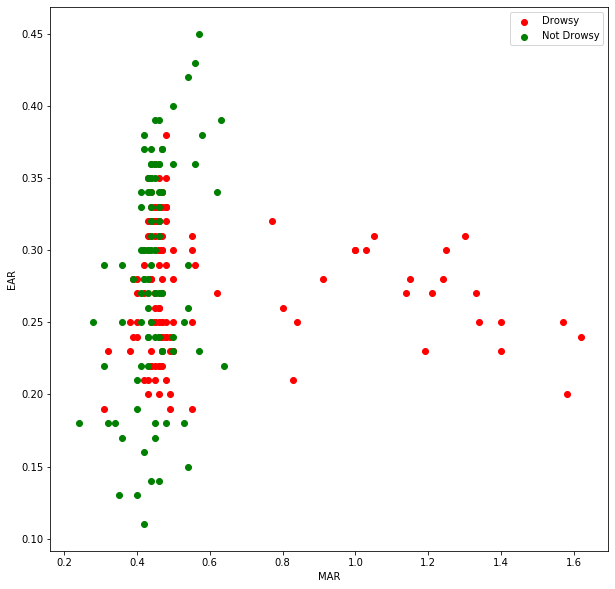

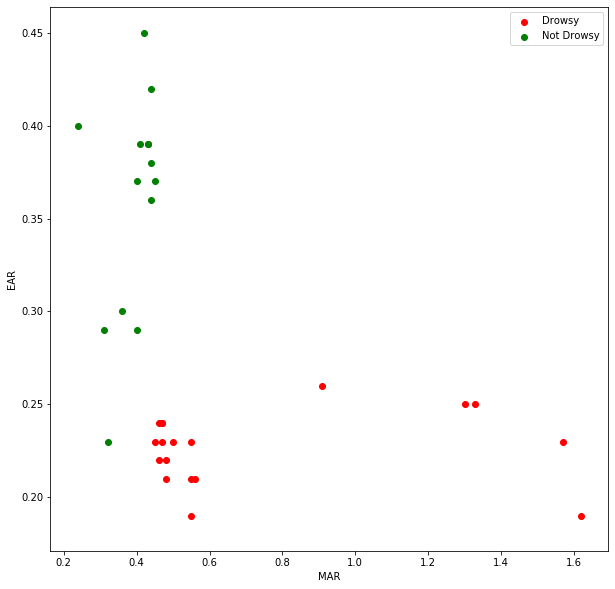

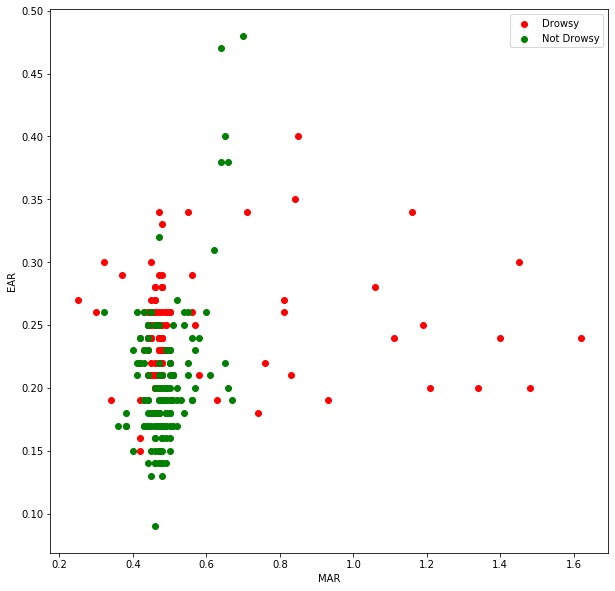

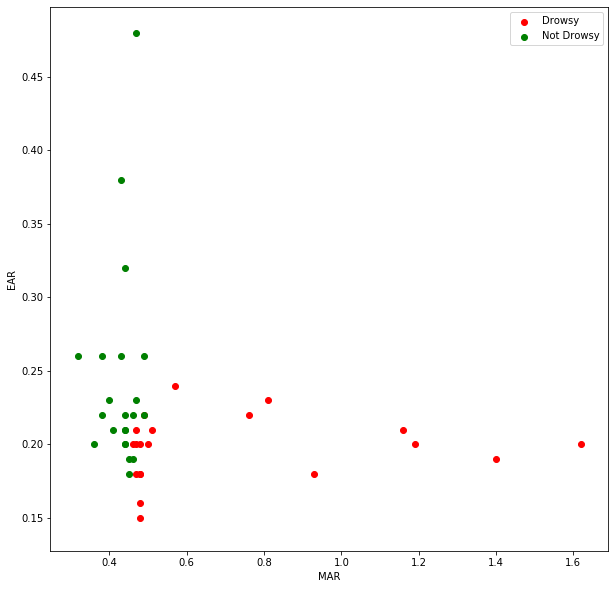

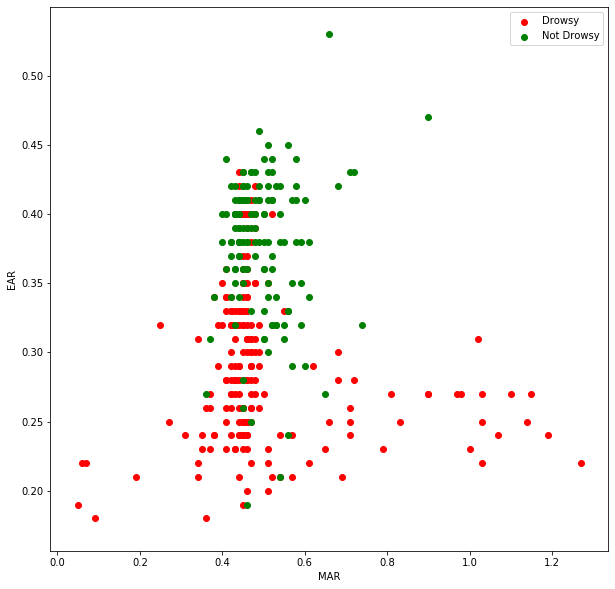

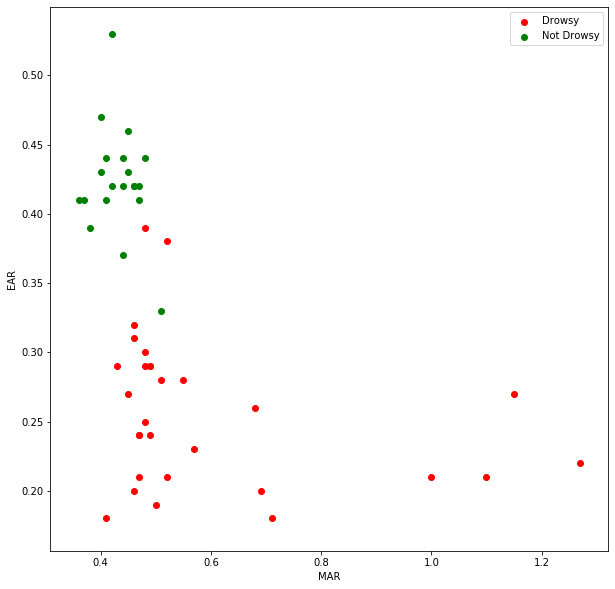

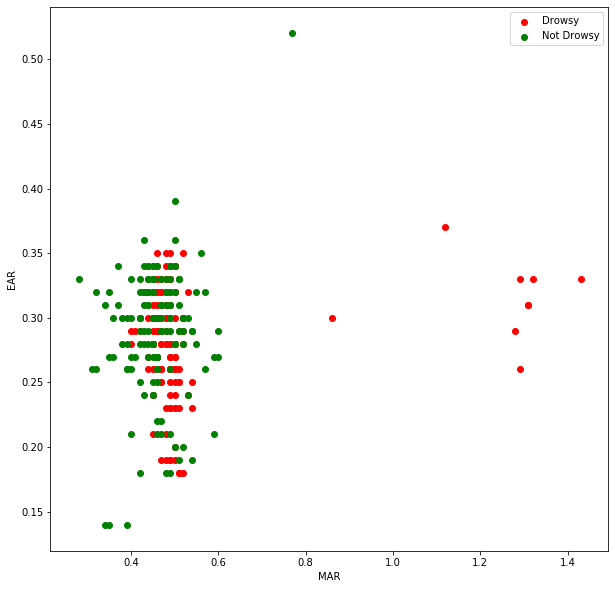

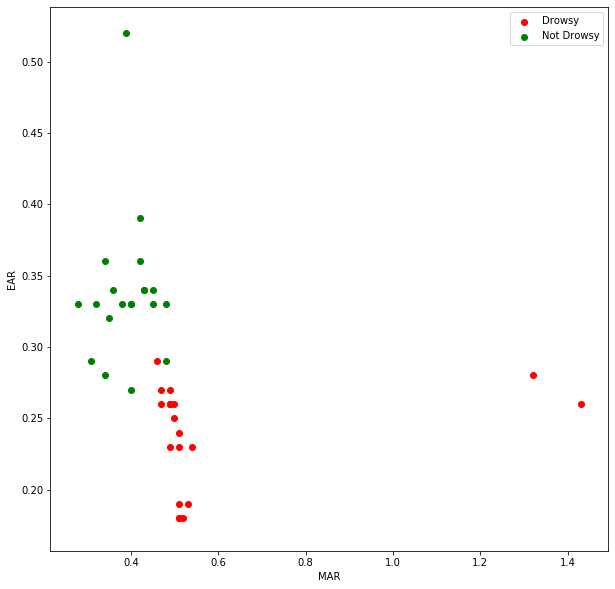

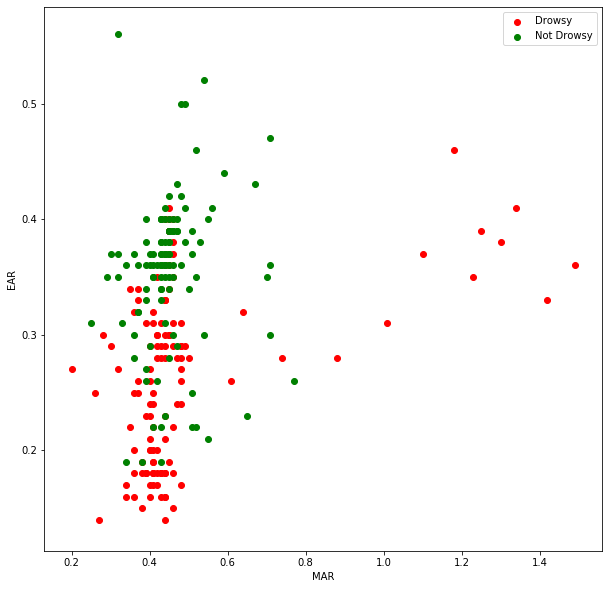

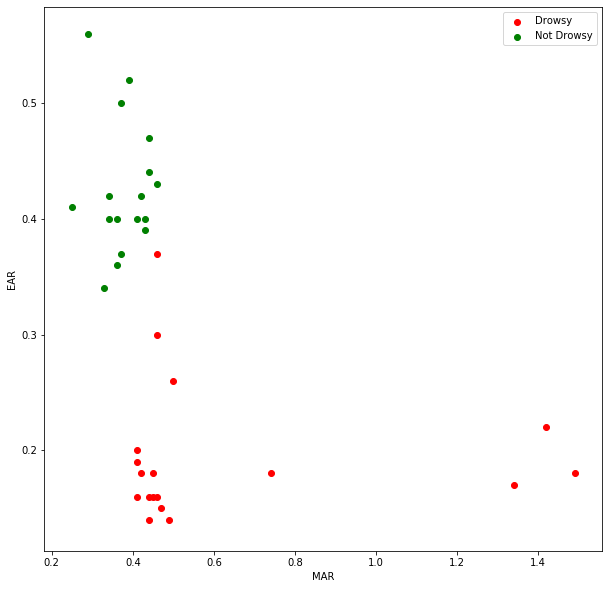

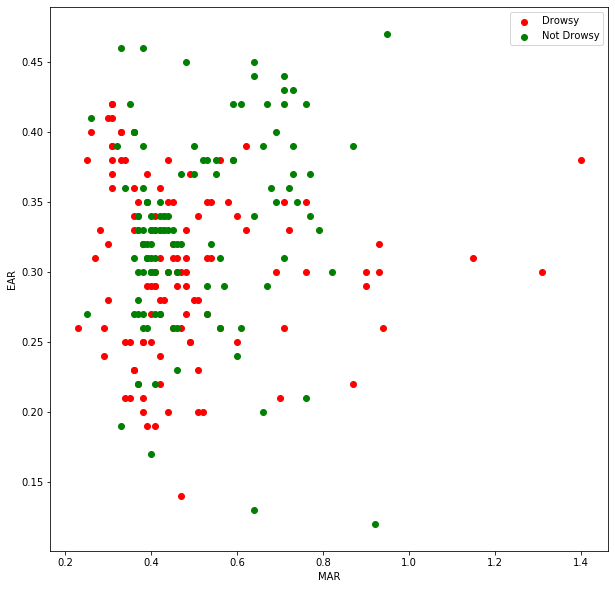

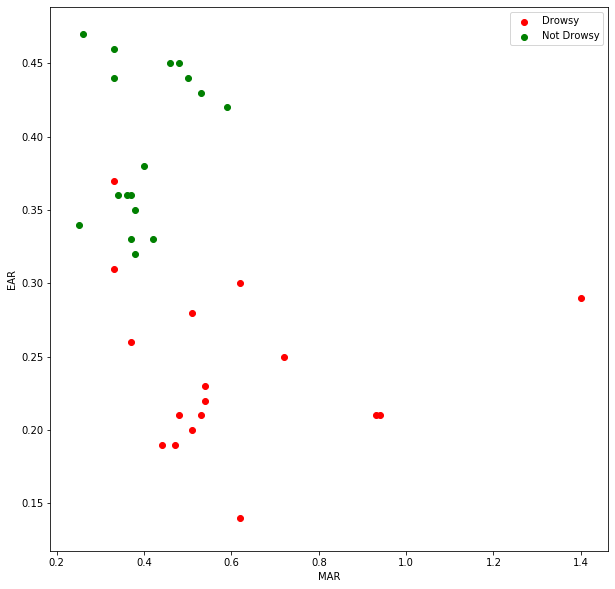

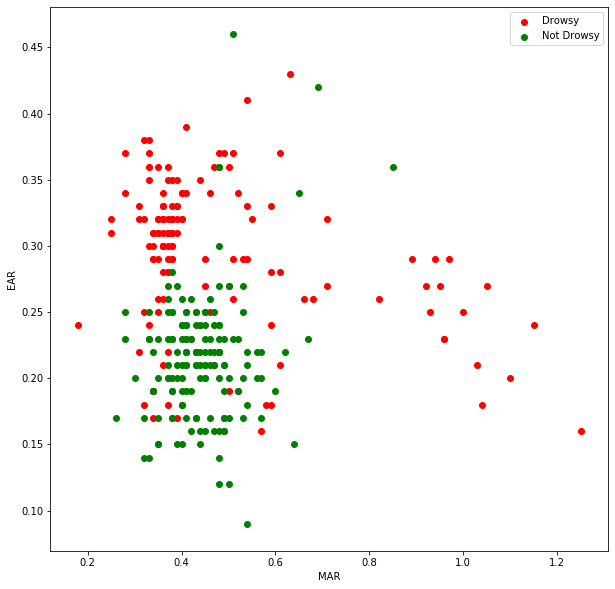

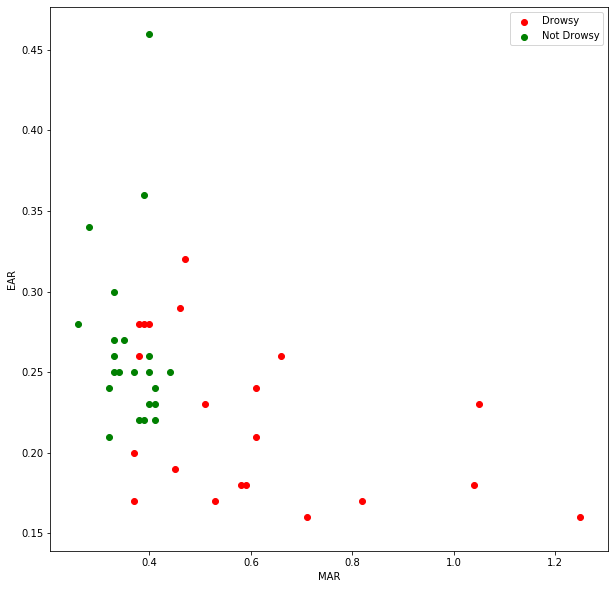

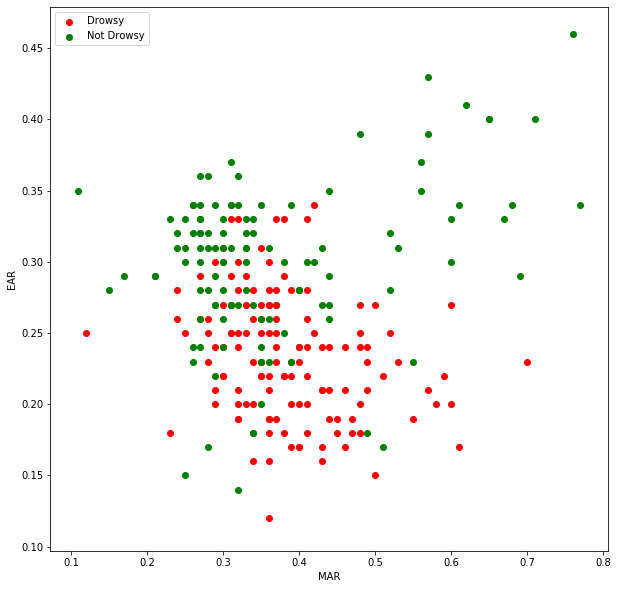

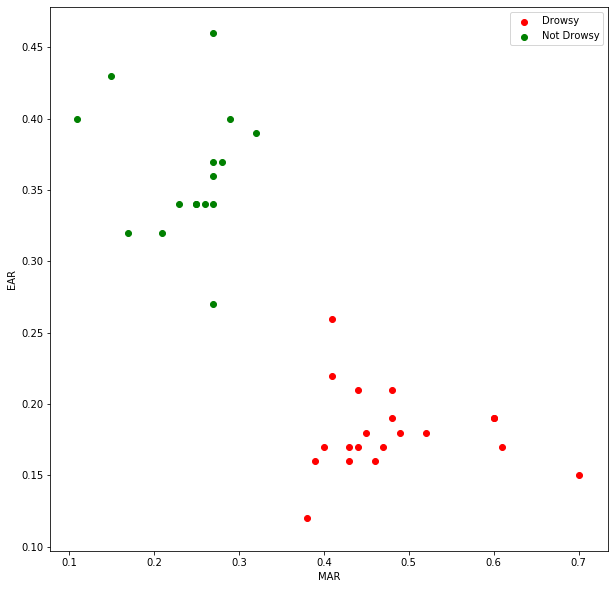

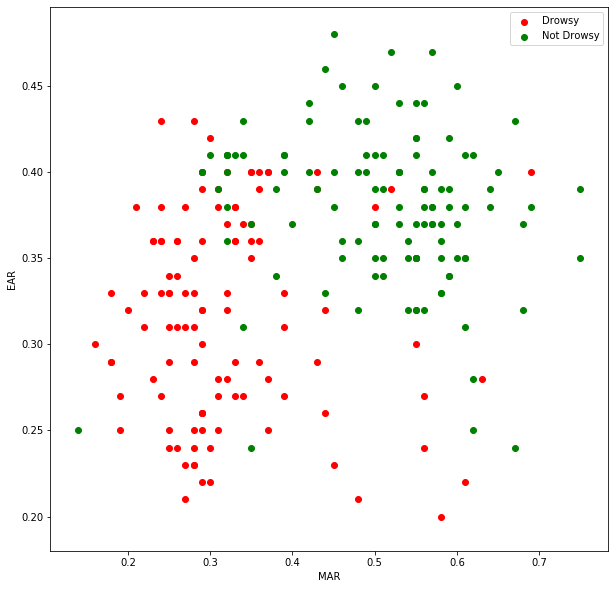

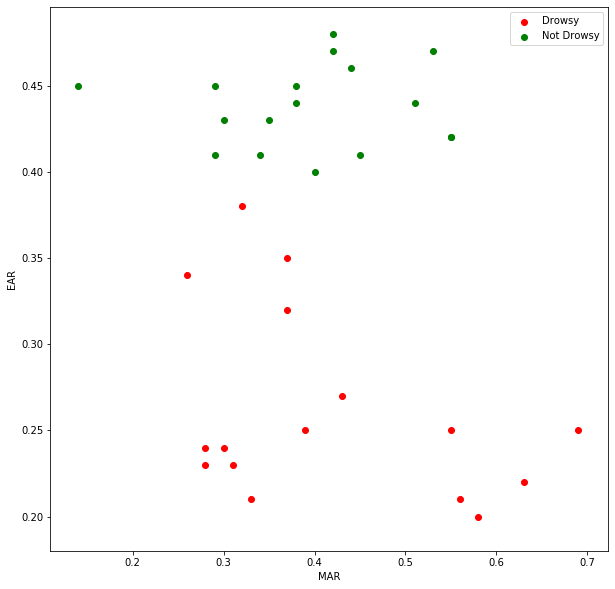

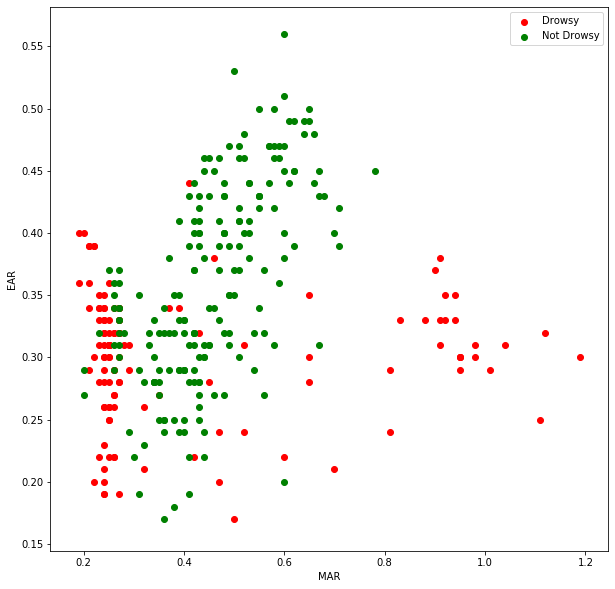

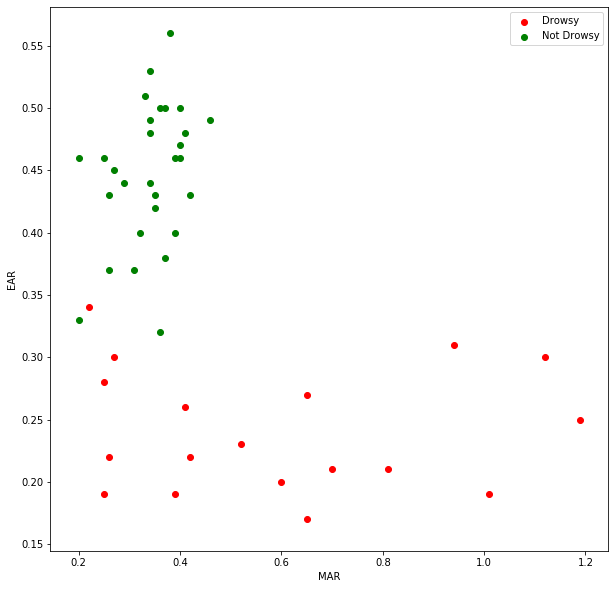

In [19]:
#vidcap = cv2.VideoCapture('drive/My Drive/Fold5_part2/' + str(j) +'/' + str(i) + '.mp4')
data = []
#NTHU_df = pd.DataFrame(data, columns=['ear', 'mar'])

NTHU_d_initial = pd.DataFrame(data, columns=['ear', 'mar'])
NTHU_nd_initial = pd.DataFrame(data, columns=['ear', 'mar'])
    
    
NTHU_d_cleaned = pd.DataFrame(data, columns=['ear', 'mar'])
NTHU_nd_cleaned = pd.DataFrame(data, columns=['ear', 'mar'])

for i in range(3,14):
    d_raw = pd.read_csv('Raw Data/Drowsy_mear_PA' + str(i) + '.csv',header=  None,index_col= None)
    nd_raw = pd.read_csv('Raw Data/NotDrowsy_mear_PA' + str(i) + '.csv',header=  None,index_col= None)
    
    
    
    # Drowsy Data
    
    # Raw Data format into required format
    d_data = []
    d_df = pd.DataFrame(d_data, columns=['ear', 'mar'])
    d_df['ear'] = d_raw.iloc[0,:]
    d_df['mar'] = d_raw.iloc[1,:]
    
    d_df.to_csv('drowsy_PA' + str(i) + '.csv', index=False)
    
    
    
    #print(d_df)
    # Data Cleaning
    d_ear= d_df.iloc[:,0:1].values
    d_mar = d_df.iloc[:,1:].values
    
    d_n = math.ceil(len(d_ear)/7)
    
    d_ear_a = np.array_split(d_ear, d_n)
    d_mar_a = np.array_split(d_mar, d_n)
    
    d_ear_c = []
    for j in d_ear_a:
        ear_j = np.amin(j)
        d_ear_c.append(ear_j)
        
    d_mar_c = []
    for j in d_mar_a:
        mar_j = np.amax(j)
        d_mar_c.append(mar_j)
        
    d_dc = pd.DataFrame(
    {'ear': d_ear_c,
     'mar': d_mar_c,
    })
    
    d_dc.to_csv('drowsy_cleaned_PA' + str(i) + '.csv', index=False)
    
    
    
    # Not Drowsy Data
    
    nd_data = []
    nd_df = pd.DataFrame(nd_data, columns=['ear', 'mar'])
    nd_df['ear'] = nd_raw.iloc[0,:]
    nd_df['mar'] = nd_raw.iloc[1,:]
    
    nd_df.to_csv('notdrowsy_PA' + str(i) + '.csv', index=False)
    

    
     # Data Cleaning
    nd_ear= nd_df.iloc[:,0:1].values
    nd_mar = nd_df.iloc[:,1:].values
    
    nd_n = math.ceil(len(nd_ear)/7)
    
    nd_ear_a = np.array_split(nd_ear, nd_n)
    nd_mar_a = np.array_split(nd_mar, nd_n)
    
    nd_ear_c = []
    for j in nd_ear_a:
        ear_j = np.amax(j)
        nd_ear_c.append(ear_j)
        
    nd_mar_c = []
    for j in nd_mar_a:
        mar_j = np.amin(j)
        nd_mar_c.append(mar_j)
        
    nd_dc = pd.DataFrame(
    {'ear': nd_ear_c,
     'mar': nd_mar_c,
    })
    
    nd_dc.to_csv('notdrowsy_cleaned_PA' + str(i) + '.csv', index=False)
    
    
    # Initial Drowsy Vs Not Drowsy Data
    
    plt.figure(figsize=(10,10))
    plt.scatter(d_df['mar'], d_df['ear'], color='red',label='Drowsy')
    plt.scatter(nd_df['mar'], nd_df['ear'], color='green', label='Not Drowsy')
    plt.xlabel('MAR')
    plt.ylabel('EAR')
    plt.legend()
    plt.savefig('pa' + str(i) + '.jpg',bbox_inches='tight')
    
    
    # Cleaned Drowsy Vs Not Drowsy Data
    
    plt.figure(figsize=(10,10))
    plt.scatter(d_dc['mar'], d_dc['ear'], color='red',label='Drowsy')
    plt.scatter(nd_dc['mar'], nd_dc['ear'], color='green', label='Not Drowsy')
    plt.xlabel('MAR')
    plt.ylabel('EAR')
    plt.legend()
    plt.savefig('pa' + str(i) + 'c.jpg',bbox_inches='tight')
   


    NTHU_d_initial = pd.concat([NTHU_d_initial,d_df],ignore_index= True)
    NTHU_nd_initial = pd.concat([NTHU_nd_initial,nd_df],ignore_index= True)
 
    
    NTHU_d_cleaned = pd.concat([NTHU_d_cleaned,d_dc],ignore_index= True)
    NTHU_nd_cleaned = pd.concat([NTHU_nd_cleaned,nd_dc],ignore_index= True)
    


    
    
#     

In [24]:
# Saving Combined NTHU DATA
NTHU_d_initial.to_csv('NTHU_drowsy.csv', index=False)
NTHU_nd_initial.to_csv('NTHU_notdrowsy.csv', index=False)

NTHU_d_cleaned.to_csv('NTHU_drowsy_cleaned.csv', index=False)
NTHU_nd_cleaned.to_csv('NTHU_notdrowsy_cleaned.csv', index=False)

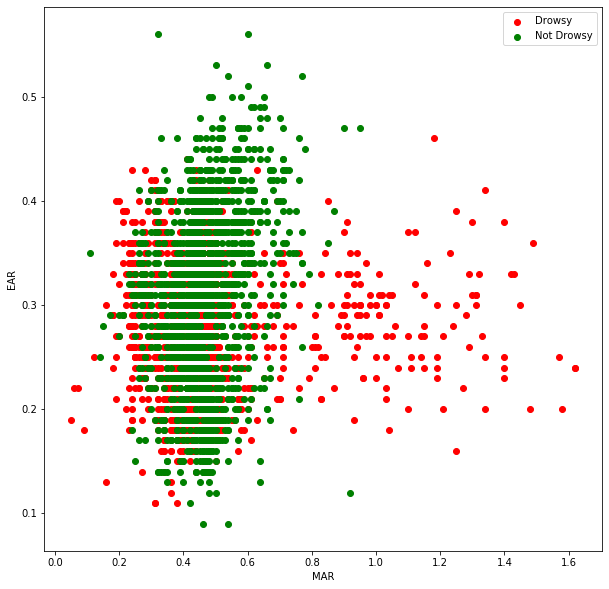

In [22]:
# Initial Data Distribution

plt.figure(figsize=(10,10))
plt.scatter(NTHU_d_initial['mar'], NTHU_d_initial['ear'], color='red',label='Drowsy')
plt.scatter(NTHU_nd_initial['mar'], NTHU_nd_initial['ear'], color='green', label='Not Drowsy')
plt.xlabel('MAR')
plt.ylabel('EAR')
plt.legend()   
plt.savefig('NTHU' + '.jpg',bbox_inches='tight')
plt.show()

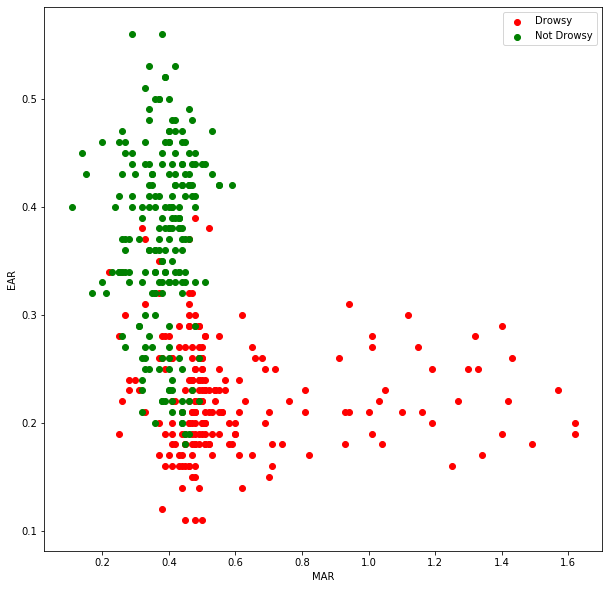

In [23]:
# Final Data Distribution

plt.figure(figsize=(10,10))
plt.scatter(NTHU_d_cleaned['mar'], NTHU_d_cleaned['ear'], color='red',label='Drowsy')
plt.scatter(NTHU_nd_cleaned['mar'], NTHU_nd_cleaned['ear'], color='green', label='Not Drowsy')
plt.xlabel('MAR')
plt.ylabel('EAR')
plt.legend()   
plt.savefig('NTHU' + 'c.jpg',bbox_inches='tight')
plt.show()